In [130]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn import metrics

In [56]:
df=pd.read_csv('https://github.com/dsrscientist/dataset4/raw/main/Japan_used_cars_datasets.csv')

In [57]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [58]:
#checking dataset shape
df.shape

(2318, 11)

In [59]:
#Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [60]:
#checking the number of missing values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In the above dataset there is no null value

In [61]:
df.describe(include='all')

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318,2318,2318.000000,2318.000000,2318.000000,2318,2318,2318,2318
unique,NaN,NaN,28,258,NaN,NaN,NaN,3,3,3,5
top,NaN,NaN,toyota,fit,NaN,NaN,NaN,at,2wd,rhd,gasoline
freq,NaN,NaN,1047,270,NaN,NaN,NaN,2171,2121,2301,2290
mean,1169.047023,971.522433,NaN,NaN,2005.972390,100013.194996,1507.010785,NaN,NaN,NaN,NaN
std,674.460724,288.673112,NaN,NaN,3.698863,52512.478883,549.585170,NaN,NaN,NaN,NaN
min,0.000000,80.000000,NaN,NaN,1979.000000,2000.000000,9.000000,NaN,NaN,NaN,NaN
25%,583.250000,776.000000,NaN,NaN,2004.000000,67000.000000,1300.000000,NaN,NaN,NaN,NaN
50%,1168.500000,1000.000000,NaN,NaN,2006.000000,94000.000000,1490.000000,NaN,NaN,NaN,NaN
75%,1753.750000,1213.000000,NaN,NaN,2009.000000,124000.000000,1800.000000,NaN,NaN,NaN,NaN


In [62]:
#Observation
#mark,model,transmission,drive,hand_drive and fuel are categorical columns
#Outliers present in engine capacity column

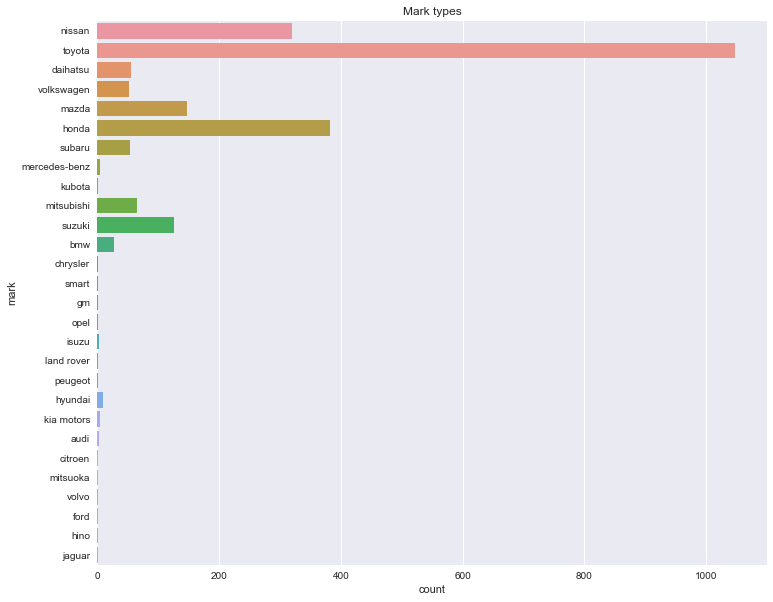

In [63]:
#let's visualize categorical column
plt.figure(figsize=(12,10))
sns.countplot(y='mark',data=df)
plt.title('Mark types')
plt.show()

Maximum no. of cars from toyota

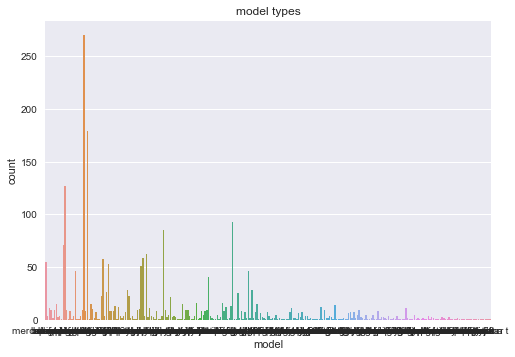

In [64]:
sns.countplot(x='model',data=df)
plt.title('model types')
plt.show()

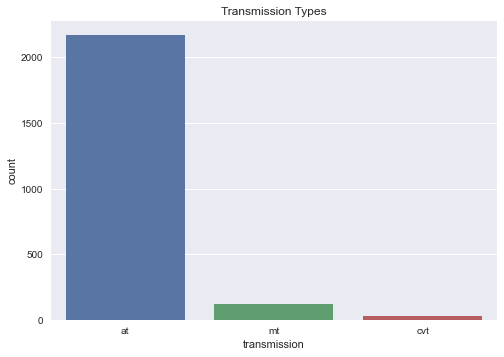

In [65]:
sns.countplot(x='transmission',data=df)
plt.title('Transmission Types')
plt.show()

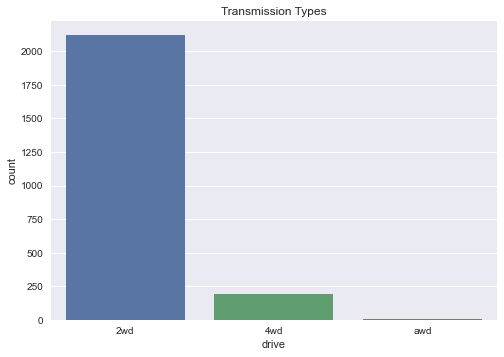

In [66]:
sns.countplot(x='drive',data=df)
plt.title('Transmission Types')
plt.show()

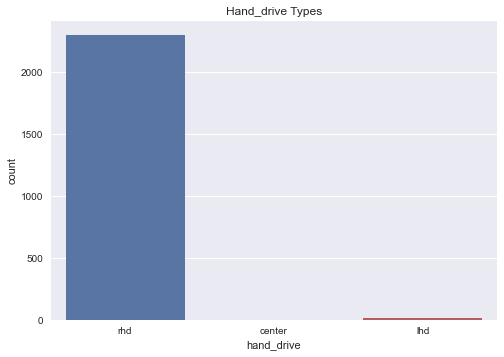

In [67]:
sns.countplot(x='hand_drive',data=df)
plt.title('Hand_drive Types')
plt.show()

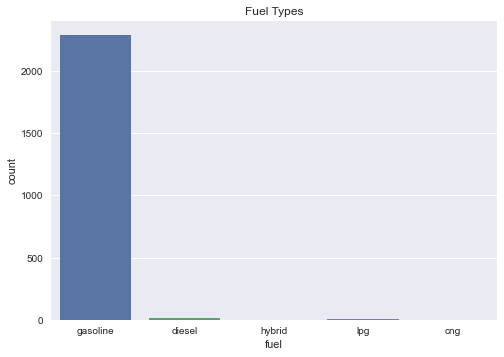

In [68]:
sns.countplot(x='fuel',data=df)
plt.title('Fuel Types')
plt.show()

In [69]:
print(df['mark'].value_counts())
print("\n\n")
print(df['model'].value_counts())
print("\n\n")
print(df['transmission'].value_counts())
print("\n\n")
print(df['drive'].value_counts())
print("\n\n")
print(df['hand_drive'].value_counts())
print("\n\n")
print(df['fuel'].value_counts())


toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64



fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64



at     2171
mt   

In [70]:
df=df.drop(["mark","model","id"],axis=1)
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,at,2wd,rhd,gasoline
1,110,2010,53000,1200,at,2wd,rhd,gasoline
2,165,2005,47690,2000,at,2wd,rhd,gasoline
3,190,2008,130661,1990,at,2wd,rhd,gasoline
4,190,2006,66300,660,at,2wd,rhd,gasoline


In [71]:
df.shape

(2318, 8)

<AxesSubplot:xlabel='transmission', ylabel='price'>

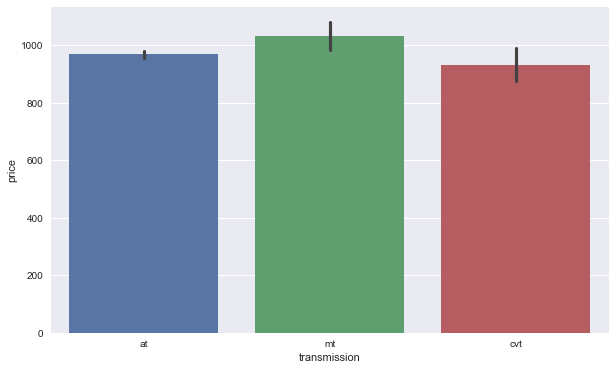

In [72]:
#visualising the categorical column
#transmission vs price
plt.figure(figsize=(10,6))
sns.barplot(x='transmission',y='price',data=df)

<AxesSubplot:xlabel='drive', ylabel='price'>

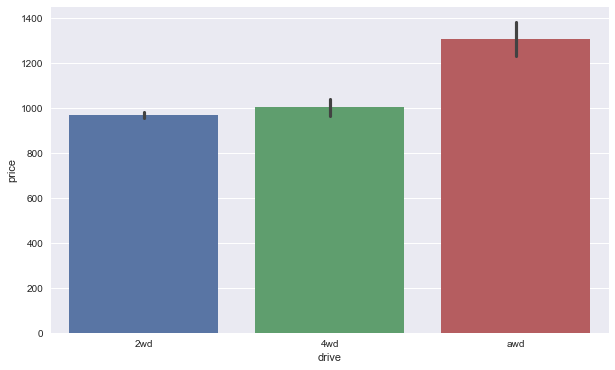

In [73]:
#drive vs price
plt.figure(figsize=(10,6))
sns.barplot(x='drive',y='price',data=df)

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

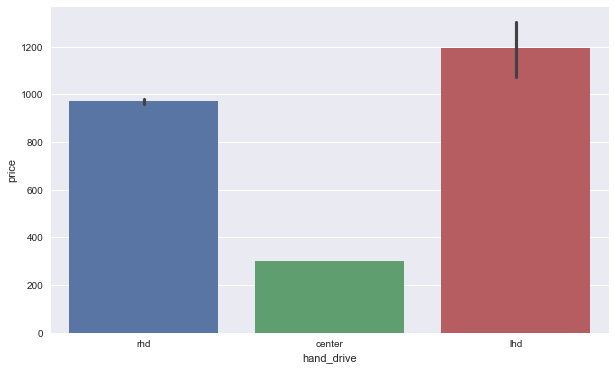

In [74]:
#hand_drive vs price
plt.figure(figsize=(10,6))
sns.barplot(x='hand_drive',y='price',data=df)

<AxesSubplot:xlabel='fuel', ylabel='price'>

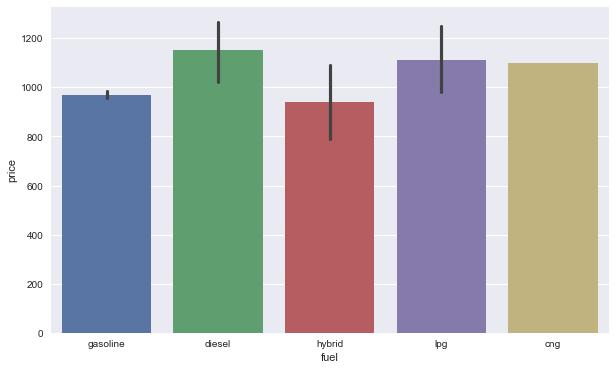

In [75]:
#fuel vs price
plt.figure(figsize=(10,6))
sns.barplot(x='fuel',y='price',data=df)

In [76]:
#encoding the categorical columns
df.replace({'transmission':{'at':0, 'mt':1, 'cvt':2}}, inplace=True)
df.replace({'drive':{'2wd':0, '4wd':1, 'awd':2}}, inplace=True)
df.replace({'hand_drive':{'rhd':0, 'lhd':1, 'center':2}}, inplace=True)
df.replace({'fuel':{'gasoline':0, 'diesel':1, 'lpg':2, 'hybrid':3, 'cng':4}}, inplace=True)

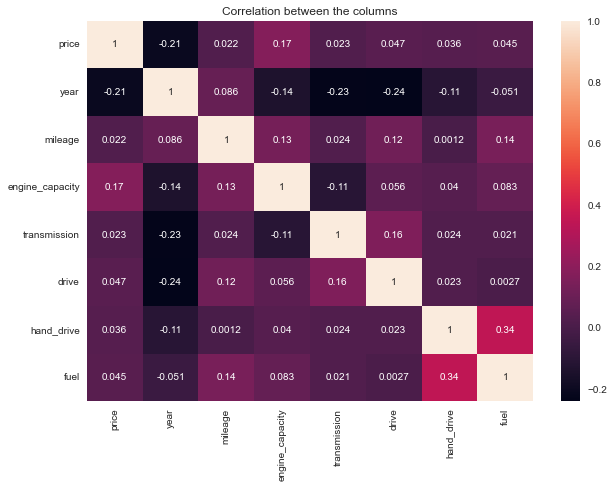

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

We see in the above map not any columns are correlated

In [78]:
#divide the data into x and y
x=df.drop('price', axis=1)
y=df['price']

In [79]:
print("shape of x is:",x.shape)
print("shape of y is:",y.shape)

shape of x is: (2318, 7)
shape of y is: (2318,)


In [81]:
#splitting Train and Test data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [82]:
scaler=StandardScaler()

In [83]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [85]:
#Model Training
lr=LinearRegression()
lr.fit(x_train,y_train)

svm=SVR()
svm.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [86]:
#Prediction on Test Data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [87]:
df1=pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})
df1

,Actual,lr,svm,rf,gr
1040,950,893.601129,980.052362,521.43619,670.625886
548,760,976.804536,1014.946635,806.61000,909.517659
100,400,833.031253,966.048642,599.20000,736.646484
1044,950,1144.712911,1045.744734,1072.25000,1026.594015
251,560,990.210645,1018.810185,1042.37000,1023.463709
...,...,...,...,...,...
30,330,906.854903,988.193908,552.19000,700.143425
2266,1388,1051.699265,1053.267048,1150.57000,1104.084045
1480,1120,1000.439232,1034.080248,1256.71000,1082.487322
1085,980,963.843263,1006.023373,1083.01500,1093.040355


Compare performance visually

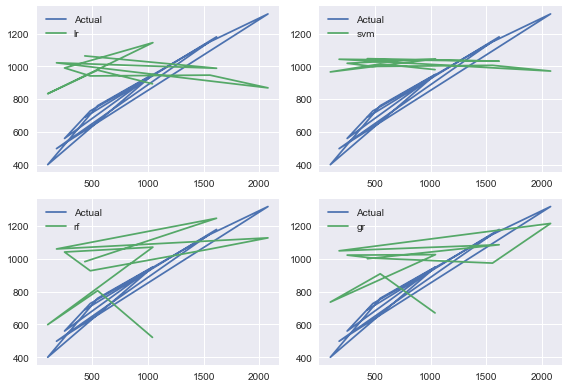

In [89]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['svm'].iloc[0:11], label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['rf'].iloc[0:11], label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['gr'].iloc[0:11], label="gr")
plt.tight_layout()
plt.legend()

In [90]:
#Evauating the Algorithm
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [91]:
print(score1, score2, score3, score4)

0.06020438348852786 0.020749603677571282 0.06705042317902743 0.13162648574455682


In [92]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [93]:
print(s1, s2, s3, s4)

233.35000268209967 238.19087613263667 225.3660062944718 224.85228545639976


In [117]:
#mean_squared_error
t1=metrics.mean_squared_error(y_test,y_pred1)
t2=metrics.mean_squared_error(y_test,y_pred2)
t3=metrics.mean_squared_error(y_test,y_pred3)
t4=metrics.mean_squared_error(y_test,y_pred4)

In [118]:
print(t1,t2,t3,t4)

78123.32280786667 81403.1194416564 77554.2252729349 72186.1468388233


In [119]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [120]:
lasscv=LassoCV(alphas=None, max_iter=100, normalize=True)
lasscv.fit(x_train,y_train)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(max_iter=100, normalize=True)

In [121]:
alpha=lasscv.alpha_
alpha

0.10088320552716279

In [122]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.10088320552716279)

In [123]:
lasso_reg.score(x_test,y_test)

0.06026536531152371

In [124]:
#Using Ridge Regression model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [125]:
ridgecv.alpha_

0.09099999999999998

In [126]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [127]:
ridge_model.score(x_test,y_test)

0.06020446301801552

In [128]:
#hyperparameter tuning
grid_param={'criterion':['friedman_mse'],'max_depth':range(10,15),'min_samples_leaf':range(2,6),'min_samples_split':range(3,8),'max_leaf_nodes':range(5,10)}


In [131]:
grid_search=GridSearchCV(estimator=gr,param_grid=grid_param,cv=5,n_jobs=-1)

In [133]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [134]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'friedman_mse', 'max_depth': 13, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [135]:
gr=GradientBoostingRegressor(criterion='friedman_mse',max_depth=13,max_leaf_nodes=8,min_samples_leaf=2,min_samples_split=5)
gr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=13, max_leaf_nodes=8, min_samples_leaf=2,
                          min_samples_split=5)

In [136]:
y_pred=gr.predict(x_test)
score=metrics.r2_score(y_test,y_pred)
print(score)

0.1441926345069373


In [97]:
#cross validation score
c1=cross_val_score(lr,x_test,y_test,cv=4)
c2=cross_val_score(svm,x_test,y_test,cv=4)
c3=cross_val_score(rf,x_test,y_test,cv=4)
c4=cross_val_score(gr,x_test,y_test,cv=4)

In [98]:
print("Linear Regression model accuracy is:{}".format(c1.mean()*100))

Linear Regression model accuracy is:3.0241843653255662


In [99]:
print("SVR model accuracy is:{}".format(c2.mean()*100))

SVR model accuracy is:1.0492125729489072


In [100]:
print("RandomForestRegressor model accuracy is:{}".format(c3.mean()*100))

RandomForestRegressor model accuracy is:3.4220465774861877


In [101]:
print("GradientBoostingRegressor model accuracy is:{}".format(c4.mean()*100))

GradientBoostingRegressor model accuracy is:4.288209361229084


In [102]:
df.columns

Index(['price', 'year', 'mileage', 'engine_capacity', 'transmission', 'drive',
       'hand_drive', 'fuel'],
      dtype='object')

In [103]:
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0,0,0,0
1,110,2010,53000,1200,0,0,0,0
2,165,2005,47690,2000,0,0,0,0
3,190,2008,130661,1990,0,0,0,0
4,190,2006,66300,660,0,0,0,0


In [104]:
data={'year':2010,'mileage':80000, 'engine_capacity':2000, 'transmission':0, 'drive':0, 'hand_drive':0, 'fuel':1}
df=pd.DataFrame(data, index=[0])
df

,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,2010,80000,2000,0,0,0,1


In [107]:
new_pred=gr.predict(df)
print(new_pred)

[1217.51326768]


C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [111]:
#Save Model Using Joblib
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [112]:
import joblib

In [113]:
joblib.dump(gr, 'model_joblib_gr')


['model_joblib_gr']

In [114]:
model=joblib.load('model_joblib_gr')

In [115]:
model.predict(df)

array([1071.36631874])